In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
import os

current_directory = os.getcwd()

print("Current Working Directory:", current_directory)


Current Working Directory: C:\Users\Luke Holmes\Desktop


In [6]:
file_path = 'Ethereum Merged Data.csv'
ethereum_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(ethereum_data.head())


                 Timestamp     Price         Volume    Market Cap
0  2015-10-21 00:00:00.000  0.439769  599041.013152  3.259030e+07
1  2015-10-22 00:00:00.000  0.565462  979304.072423  4.191854e+07
2  2015-10-23 00:00:00.000  0.540738  866798.488854  4.010011e+07
3  2015-10-24 00:00:00.000  0.568574  259157.662411  4.217907e+07
4  2015-10-25 00:00:00.000  0.631939  476617.738601  4.689593e+07


In [8]:
ethereum_data.shape

(2964, 4)

In [9]:
ethereum_data.descrie

<bound method NDFrame.describe of                     Timestamp        Price        Volume    Market Cap
0     2015-10-21 00:00:00.000     0.439769  5.990410e+05  3.259030e+07
1     2015-10-22 00:00:00.000     0.565462  9.793041e+05  4.191854e+07
2     2015-10-23 00:00:00.000     0.540738  8.667985e+05  4.010011e+07
3     2015-10-24 00:00:00.000     0.568574  2.591577e+05  4.217907e+07
4     2015-10-25 00:00:00.000     0.631939  4.766177e+05  4.689593e+07
...                       ...          ...           ...           ...
2959  2023-11-28 00:00:00.000  2030.000506  1.922688e+10  2.437204e+11
2960  2023-11-29 00:00:00.000  2048.535257  1.642457e+10  2.462628e+11
2961  2023-11-30 00:00:00.000  2025.937328  1.309906e+10  2.440015e+11
2962  2023-12-01 00:00:00.000  2051.756718  1.162592e+10  2.468482e+11
2963  2023-12-02 00:00:00.000  2085.712361  1.991308e+10  2.506407e+11

[2964 rows x 4 columns]>

In [10]:
ethereum_data.head

<bound method NDFrame.head of                     Timestamp        Price        Volume    Market Cap
0     2015-10-21 00:00:00.000     0.439769  5.990410e+05  3.259030e+07
1     2015-10-22 00:00:00.000     0.565462  9.793041e+05  4.191854e+07
2     2015-10-23 00:00:00.000     0.540738  8.667985e+05  4.010011e+07
3     2015-10-24 00:00:00.000     0.568574  2.591577e+05  4.217907e+07
4     2015-10-25 00:00:00.000     0.631939  4.766177e+05  4.689593e+07
...                       ...          ...           ...           ...
2959  2023-11-28 00:00:00.000  2030.000506  1.922688e+10  2.437204e+11
2960  2023-11-29 00:00:00.000  2048.535257  1.642457e+10  2.462628e+11
2961  2023-11-30 00:00:00.000  2025.937328  1.309906e+10  2.440015e+11
2962  2023-12-01 00:00:00.000  2051.756718  1.162592e+10  2.468482e+11
2963  2023-12-02 00:00:00.000  2085.712361  1.991308e+10  2.506407e+11

[2964 rows x 4 columns]>

In [12]:
# Removing rows with NaN values
ed.dropna()
(ed.shape)
(ed.head())
(ed.tail())

,Timestamp,Price,Volume,Market Cap
2959,2023-11-28 00:00:00.000,2030.000506,1.922688e+10,2.437204e+11
2960,2023-11-29 00:00:00.000,2048.535257,1.642457e+10,2.462628e+11
2961,2023-11-30 00:00:00.000,2025.937328,1.309906e+10,2.440015e+11
2962,2023-12-01 00:00:00.000,2051.756718,1.162592e+10,2.468482e+11
2963,2023-12-02 00:00:00.000,2085.712361,1.991308e+10,2.506407e+11


In [13]:
print(ed.isnull().sum())


Timestamp     0
Price         0
Volume        0
Market Cap    0
dtype: int64


In [15]:
ed.dtypes


Timestamp      object
Price         float64
Volume        float64
Market Cap    float64
dtype: object

In [18]:
ed.rename(columns={'Timestamp': 'date'}, inplace=True)
print(ed.head())


        date     Price         Volume    Market Cap
0 2015-10-21  0.439769  599041.013152  3.259030e+07
1 2015-10-22  0.565462  979304.072423  4.191854e+07
2 2015-10-23  0.540738  866798.488854  4.010011e+07
3 2015-10-24  0.568574  259157.662411  4.217907e+07
4 2015-10-25  0.631939  476617.738601  4.689593e+07


In [19]:
ed['year'] = pd.to_datetime(ed['date']).dt.year
ed['month'] = pd.to_datetime(ed['date']).dt.month
ed['day'] = pd.to_datetime(ed['date']).dt.day
ed['weekday'] = pd.to_datetime(ed['date']).dt.weekday


In [20]:
ed['price_7day_avg'] = ed['Price'].rolling(window=7).mean()
ed['volume_7day_avg'] = ed['Volume'].rolling(window=7).mean()


In [21]:
ed['price_change_pct'] = ed['Price'].pct_change() * 100


In [22]:
ed['volume_change_pct'] = ed['Volume'].pct_change() * 100


In [23]:
ed['market_cap_volume_ratio'] = ed['Market Cap'] / ed['Volume']


In [24]:
ed['price_lag1'] = ed['Price'].shift(1)
ed['volume_lag1'] = ed['Volume'].shift(1)


In [25]:
ed['price_ema_short'] = ed['Price'].ewm(span=12, adjust=False).mean()  # short-term EMA
ed['price_ema_long'] = ed['Price'].ewm(span=26, adjust=False).mean()  # long-term EMA


In [27]:
delta = ed['Price'].diff()
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0
ed['rsi'] = 100 - (100 / (1 + up.rolling(window=14).mean() / down.abs().rolling(window=14).mean()))


In [28]:
ed['week_of_year'] = pd.to_datetime(ed['date']).dt.isocalendar().week
ed['quarter'] = pd.to_datetime(ed['date']).dt.quarter


In [30]:
ed['days_since_launch'] = (pd.to_datetime(ed['date']) - pd.to_datetime(ed['date']).min()).dt.days



In [31]:
cdata=combined_data

In [35]:
ed['cumulative_return'] = (1 + ed['Price'].pct_change()).cumprod()


In [36]:
ed['cumulative_volume'] = ed['Volume'].cumsum()


In [37]:
ed['price_ma_ratio'] = ed['Price'] / ed['Price'].rolling(window=20).mean()


In [39]:
ed['normalized_price'] = ed['Price'] / ed['Price'].max()


In [40]:
ed.head(50)

,date,Price,Volume,Market Cap,year,month,day,weekday,price_7day_avg,volume_7day_avg,...,rsi,week_of_year,quarter,days_since_start,days_since_launch,price_rate_of_change,cumulative_return,cumulative_volume,price_ma_ratio,normalized_price
0,2015-10-21,0.439769,5.990410e+05,3.259030e+07,2015,10,21,2,NaN,NaN,...,NaN,43,4,0,0,NaN,NaN,5.990410e+05,NaN,0.000091
1,2015-10-22,0.565462,9.793041e+05,4.191854e+07,2015,10,22,3,NaN,NaN,...,NaN,43,4,1,1,0.285815,1.285815,1.578345e+06,NaN,0.000117
2,2015-10-23,0.540738,8.667985e+05,4.010011e+07,2015,10,23,4,NaN,NaN,...,NaN,43,4,2,2,-0.043723,1.229595,2.445144e+06,NaN,0.000112
3,2015-10-24,0.568574,2.591577e+05,4.217907e+07,2015,10,24,5,NaN,NaN,...,NaN,43,4,3,3,0.051478,1.292892,2.704301e+06,NaN,0.000118
4,2015-10-25,0.631939,4.766177e+05,4.689593e+07,2015,10,25,6,NaN,NaN,...,NaN,43,4,4,4,0.111446,1.436979,3.180919e+06,NaN,0.000131
5,2015-10-26,0.743958,1.174027e+06,5.522699e+07,2015,10,26,0,NaN,NaN,...,NaN,44,4,5,5,0.177263,1.691702,4.354946e+06,NaN,0.000155
6,2015-10-27,0.854455,1.887569e+06,6.345150e+07,2015,10,27,1,0.620699,8.917878e+05,...,NaN,44,4,6,6,0.148526,1.942964,6.242515e+06,NaN,0.000177
7,2015-10-28,1.010410,2.447634e+06,7.505796e+07,2015,10,28,2,0.702219,1.155872e+06,...,NaN,44,4,7,7,0.182519,2.297592,8.690148e+06,NaN,0.000210
8,2015-10-29,1.163749,2.236842e+06,8.647898e+07,2015,10,29,3,0.787689,1.335521e+06,...,NaN,44,4,8,8,0.151759,2.646273,1.092699e+07,NaN,0.000242
9,2015-10-30,1.041849,2.384550e+06,7.744784e+07,2015,10,30,4,0.859276,1.552342e+06,...,NaN,44,4,9,9,-0.104747,2.369083,1.331154e+07,NaN,0.000216


Charts

Line Plot

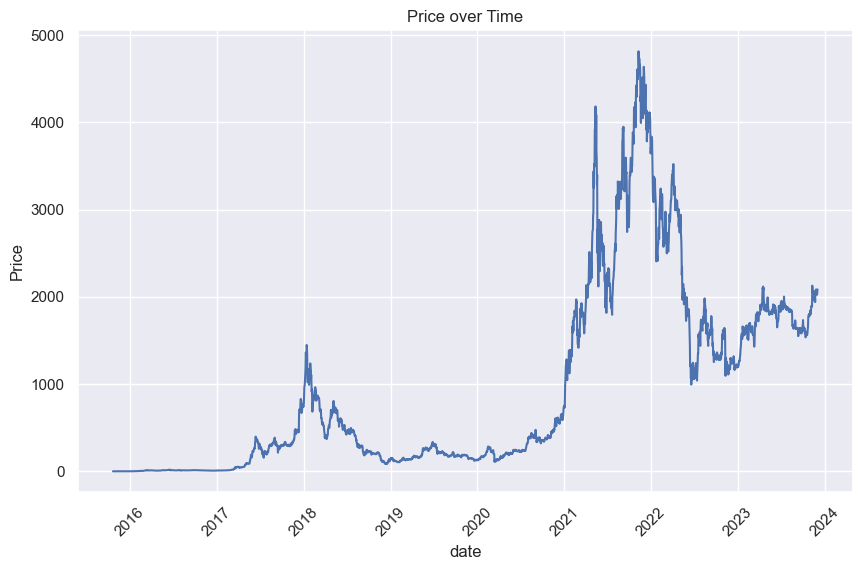

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='Price', data=ed)
plt.title('Price over Time')
plt.xticks(rotation=45)
plt.show()


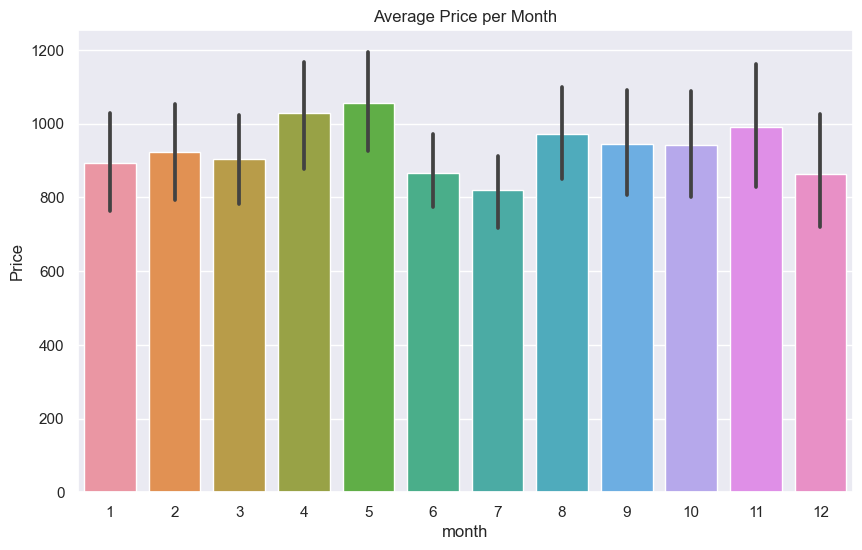

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='Price', data=ed)
plt.title('Average Price per Month')
plt.show()


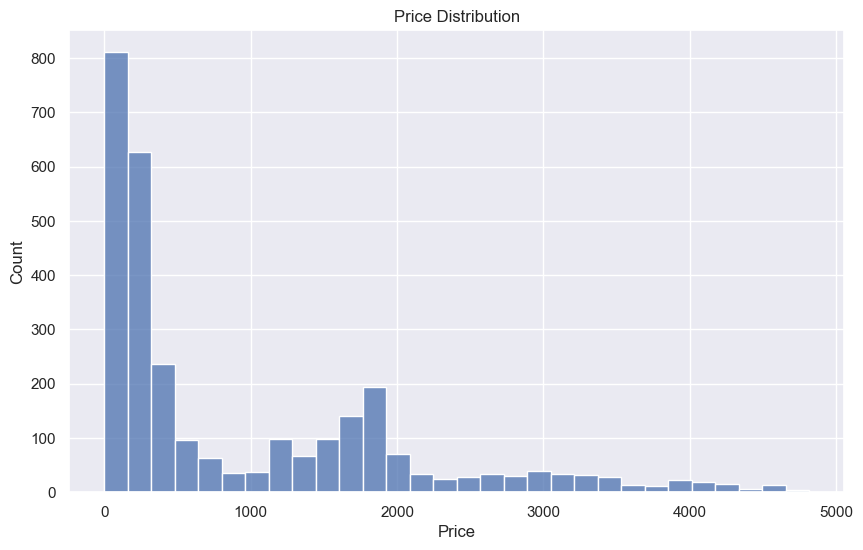

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(ed['Price'], bins=30)
plt.title('Price Distribution')
plt.show()


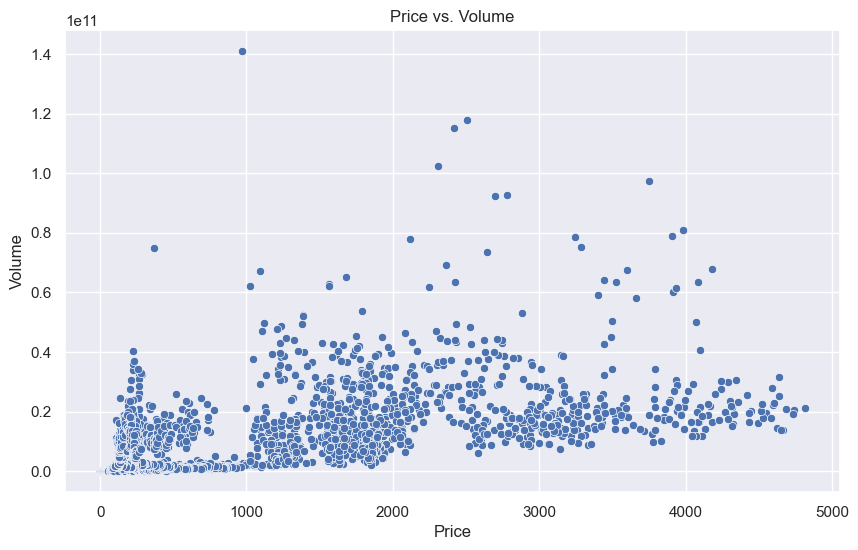

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Volume', data=ed)
plt.title('Price vs. Volume')
plt.show()


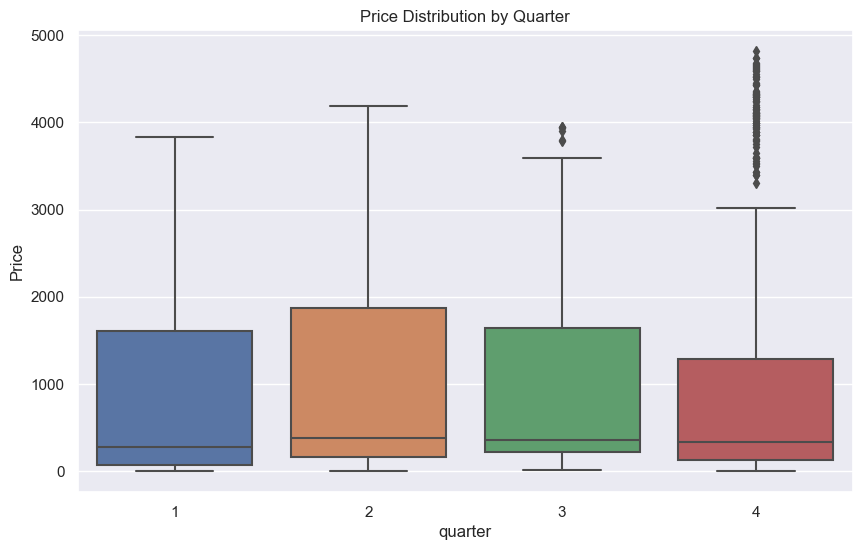

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quarter', y='Price', data=ed)
plt.title('Price Distribution by Quarter')
plt.show()


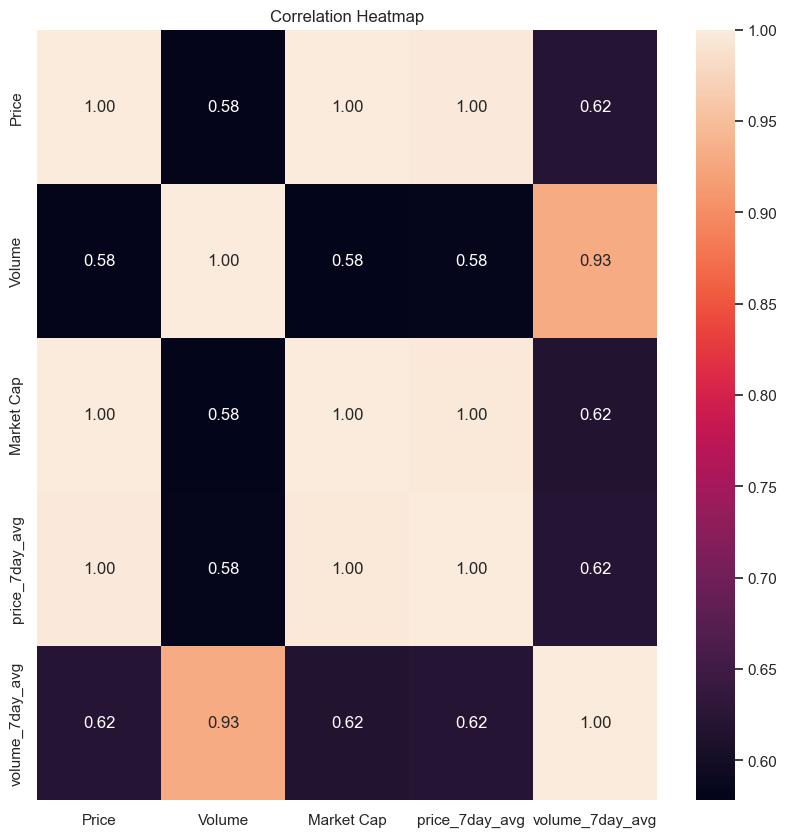

In [46]:
plt.figure(figsize=(10, 10))
sns.heatmap(ed[['Price', 'Volume', 'Market Cap', 'price_7day_avg', 'volume_7day_avg']].corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


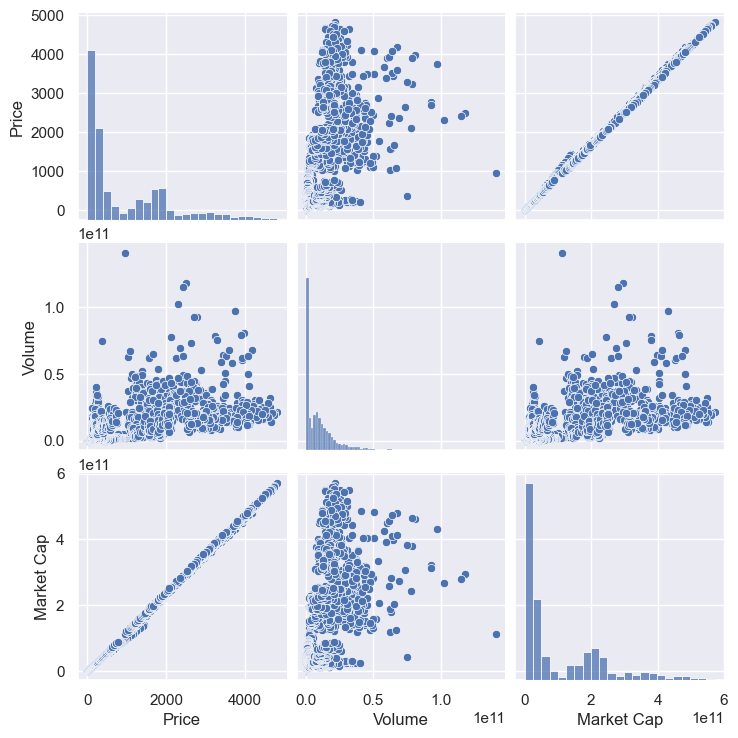

In [47]:
sns.pairplot(ed[['Price', 'Volume', 'Market Cap']])
plt.show()


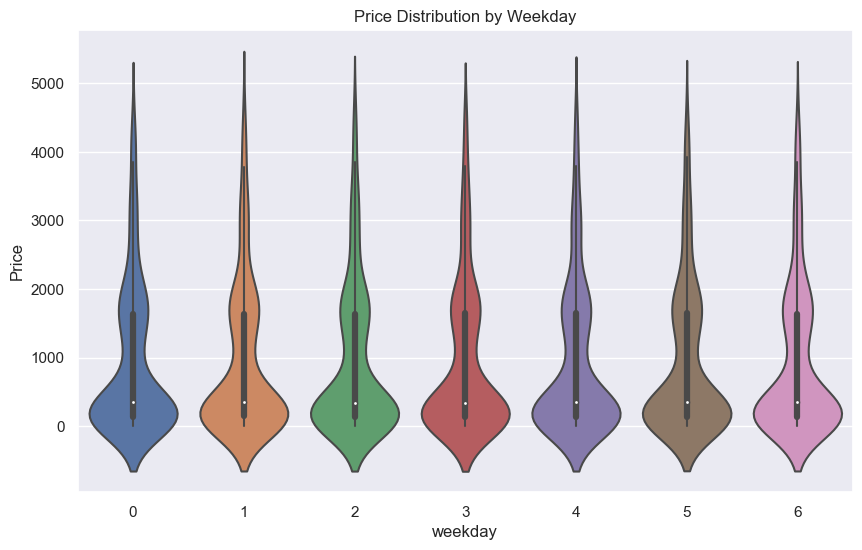

In [48]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='weekday', y='Price', data=ed)
plt.title('Price Distribution by Weekday')
plt.show()


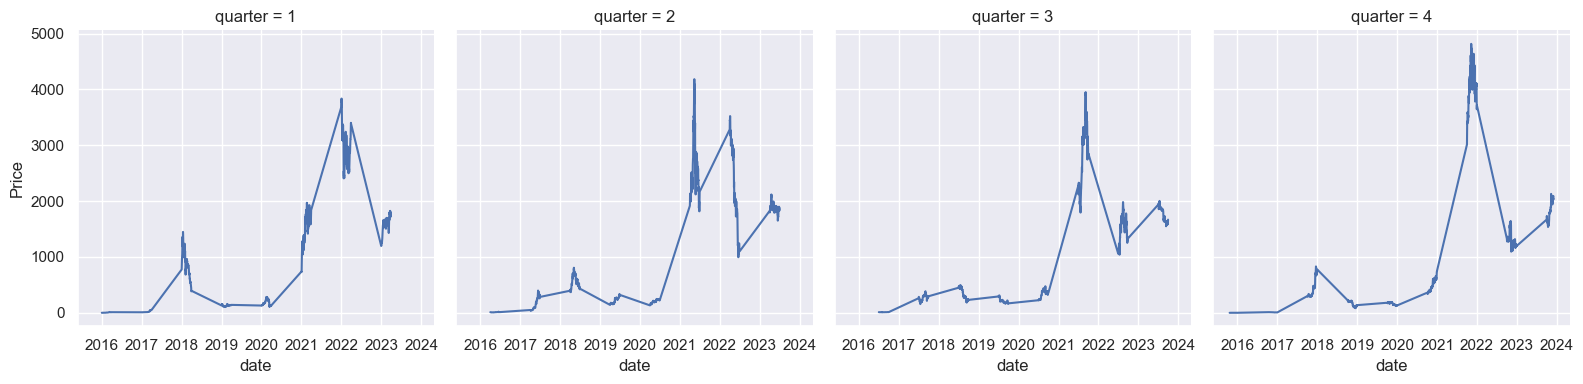

In [49]:
g = sns.FacetGrid(ed, col='quarter', height=4, aspect=1)
g = g.map(plt.plot, 'date', 'Price')
plt.show()


C:\Users\Luke Holmes\AppData\Local\Temp\ipykernel_13672\2343393537.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ed['Price'], shade=True)


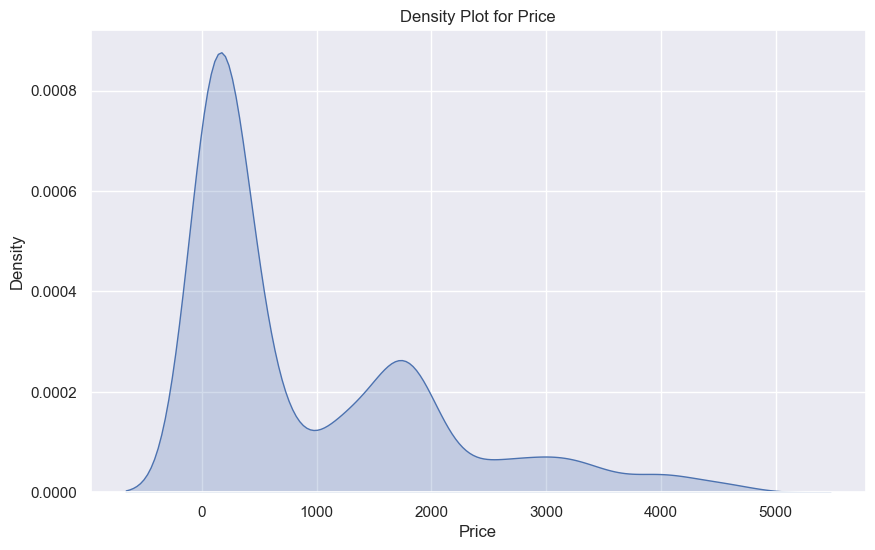

In [50]:
plt.figure(figsize=(10, 6))
sns.kdeplot(ed['Price'], shade=True)
plt.title('Density Plot for Price')
plt.show()


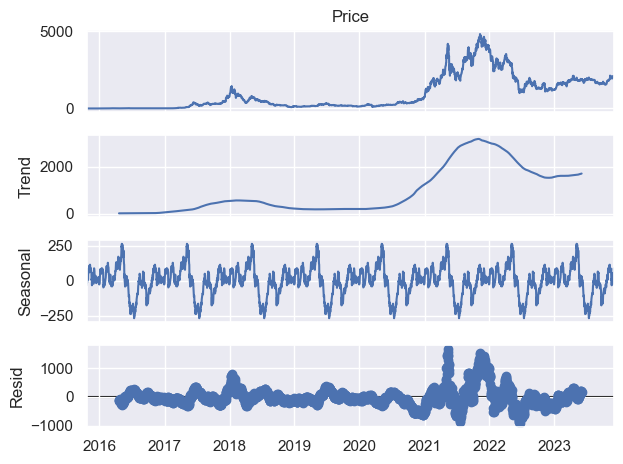

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

ed['date'] = pd.to_datetime(ed['date'])
ed.set_index('date', inplace=True)

result = seasonal_decompose(ed['Price'], model='additive', period=365)
result.plot()
plt.show()


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Luke Holmes\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 40.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Luke Holmes\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 39.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Luke Holmes\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 40.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Luke Holmes\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: Us

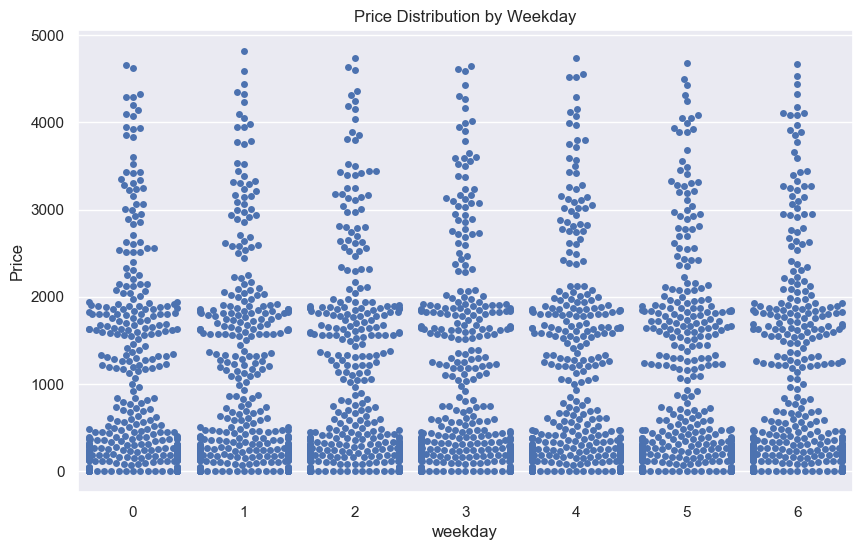

In [52]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='weekday', y='Price', data=ed)
plt.title('Price Distribution by Weekday')
plt.show()


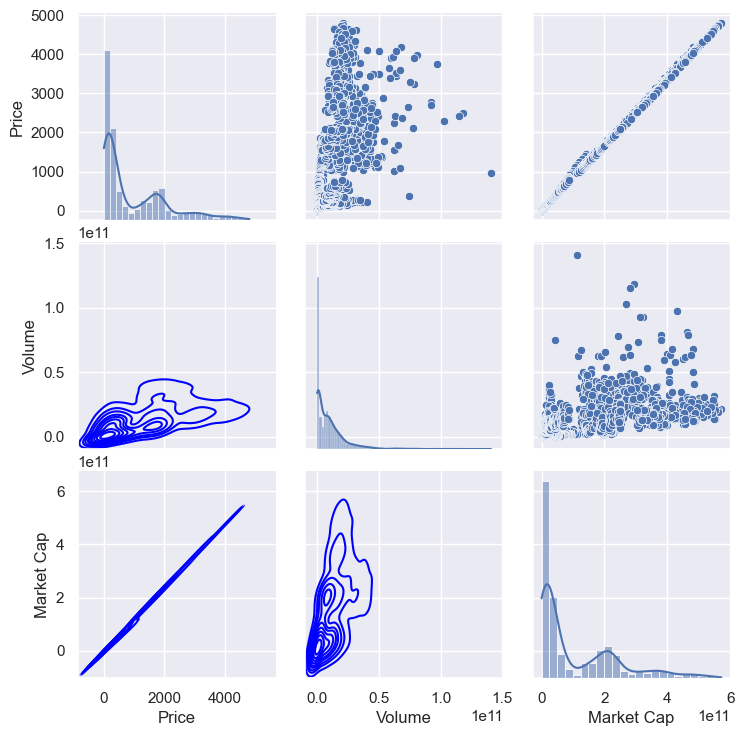

In [53]:
g = sns.PairGrid(ed[['Price', 'Volume', 'Market Cap']])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, colors='blue')
g.map_diag(sns.histplot, kde=True)
plt.show()


Machien Learning Models

Linear Regression

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


X = ed[['Volume', 'Market Cap', 'year', 'month', 'day']]  
y = ed['Price']

X.fillna(method='ffill', inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 39.47773162973353


C:\Users\Luke Holmes\AppData\Local\Temp\ipykernel_13672\741887770.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(method='ffill', inplace=True)


Ridge Regression

In [55]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f'Ridge Regression RMSE: {rmse_ridge}')



Ridge Regression RMSE: 39.47774758080064


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.34559e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
Lasso

In [56]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f'Lasso Regression RMSE: {rmse_lasso}')



Lasso Regression RMSE: 39.47820594449236


Decision Tree

In [57]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print(f'Decision Tree Regression RMSE: {rmse_tree}')


Decision Tree Regression RMSE: 17.157373350291227


Random Forest Regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'Random Forest Regression RMSE: {rmse_rf}')


Random Forest Regression RMSE: 14.140079620658083


In [59]:
from sklearn.svm import SVR

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train, y_train)
y_pred_svr = svr_reg.predict(X_test)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
print(f'Support Vector Regression RMSE: {rmse_svr}')


Support Vector Regression RMSE: 707.9913315066016


In [60]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(n_estimators=100)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print(f'Gradient Boosting Regression RMSE: {rmse_gb}')


Gradient Boosting Regression RMSE: 15.288595590729575


In [61]:
print(f'Ridge Regression RMSE: {rmse_ridge}')
print(f'Lasso Regression RMSE: {rmse_lasso}')
print(f'Decision Tree Regression RMSE: {rmse_tree}')
print(f'Random Forest Regression RMSE: {rmse_rf}')
print(f'Support Vector Regression RMSE: {rmse_svr}')
print(f'Gradient Boosting Regression RMSE: {rmse_gb}')

Ridge Regression RMSE: 39.47774758080064
Lasso Regression RMSE: 39.47820594449236
Decision Tree Regression RMSE: 17.157373350291227
Random Forest Regression RMSE: 14.140079620658083
Support Vector Regression RMSE: 707.9913315066016
Gradient Boosting Regression RMSE: 15.288595590729575


In [65]:
def custom_accuracy(y_true, y_pred, threshold=0.01):
    """
    Calculate the percentage of predictions within a certain threshold.

    :param y_true: Actual values
    :param y_pred: Predicted values
    :param threshold: Threshold for considering a prediction accurate (default 1%)
    :return: Accuracy as a percentage
    """
    within_threshold = np.abs(y_true - y_pred) <= threshold * np.abs(y_true)
    accuracy = np.mean(within_threshold)
    return accuracy * 100

accuracy = custom_accuracy(y_test, y_pred_rf)
print(f'Custom Accuracy: {accuracy:.2f}%')


Custom Accuracy: 70.83%


In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100)
cv_scores = cross_val_score(rf_reg, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)
print("RMSE scores for each fold:", rmse_scores)
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Standard Deviation of RMSE: {np.std(rmse_scores)}")


RMSE scores for each fold: [ 71.72642827  71.70801052  17.47920171 476.23016616  86.18651133]
Mean RMSE: 144.66606359902033
Standard Deviation of RMSE: 167.4360641500294


In [68]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)

print("Best Parameters:", rf_random.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
126 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
85 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Luke Hol

Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
